# Tides
## What causes tides?
### Tides are the result of the gravitational pull of the moon on the Earth's water.

I am thinking one plot of a single day of tides accompanied by four images of earth/moon.  There will be one dot on each (red, green, blue, yellow) at first High, first Low, second High, second Low.  Corresponding to the time at which those tides occur. (I will draw the pictures in Illustrator).

Next, I see a description of how the phase of the moon affects the tides (Spring/Neap)
This will be accompanied by pictures showing the Earth/Moon/Sun in the correct arrangment for each (Four images again, new moon, first quarter, full mooon, third quarter)
There will be two Spring tide days (set of full moon and new moon dates are in the data folder) and two neap tide days (also in data folder).

All of this can just use data from one station.

Then we should pull in all three stations and (still working out exactly how I want to show this) show how the water level compares between the three across a day. (This is to show the ebb and flow of the tides into the sound, steep positive slope to flat to steep negative slope and back).

We may want to pick a full month of data to plot to show how the range of the tides changes throughout the month (from new moon to new moon).

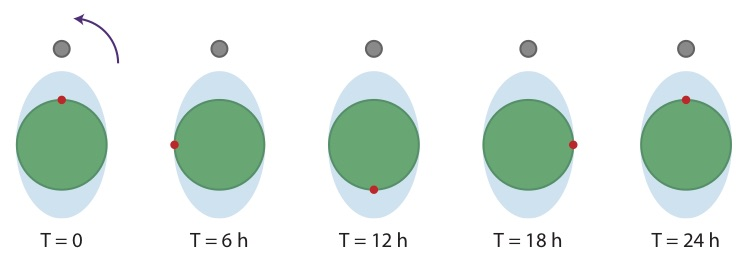

In [3]:
from IPython.display import Image
Image ("../Figures/Earth_Moon_Tides.jpg")

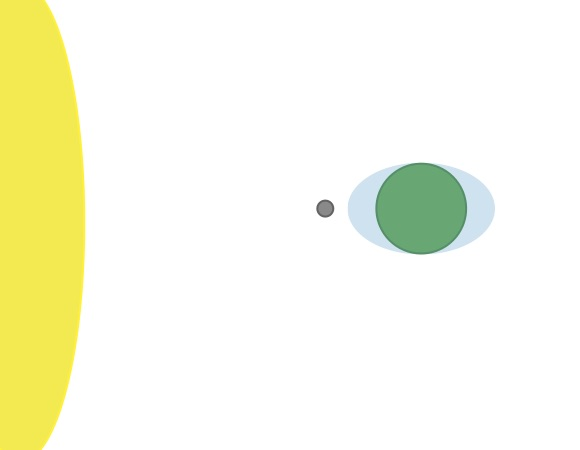

In [4]:
Image ("../Figures/NewMoon.jpg")

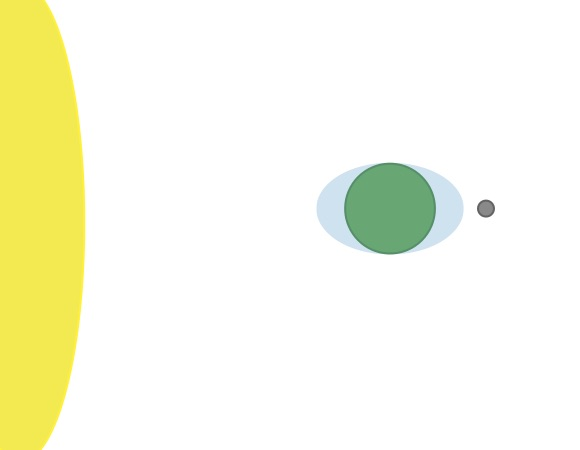

In [5]:
Image ("../Figures/FullMoon.jpg")

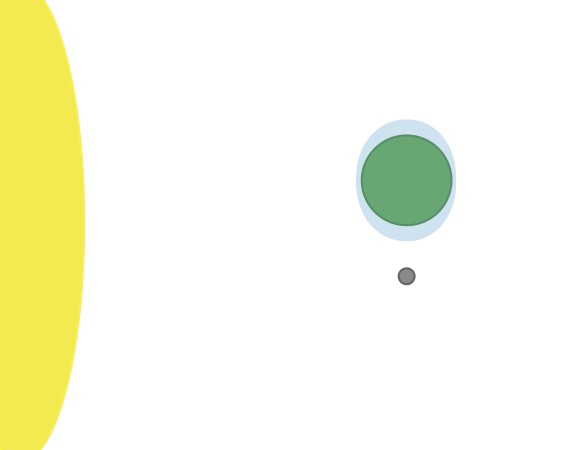

In [6]:
Image ("../Figures/FirstQuarter.jpg")

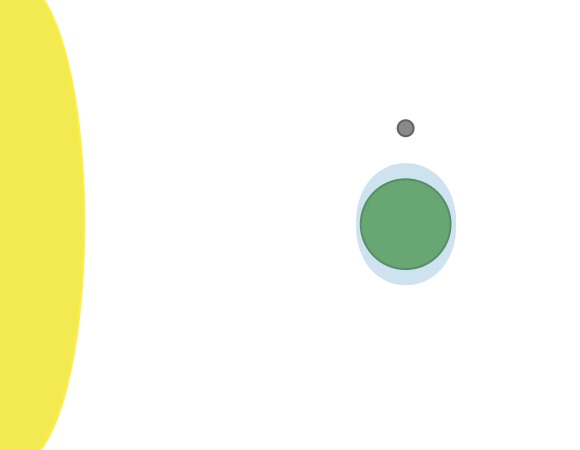

In [7]:
Image ("../Figures/ThirdQuarter.jpg")